In [47]:
from ultimate_pig import Player, OptimalSolitairePlayer, OptimalPlayer, Game
#from ultimate_pig import *
import random

In [48]:
player = Player()
optimalplayer = OptimalPlayer()
optimal_sol_player = OptimalSolitairePlayer()

In [49]:
game = Game(current_player = player, rounds = 7)

In [50]:
simsplayer1 = []
sims_optimal1 = []
sims_optimal_sol1 = []
for _ in range(200):
    player = Player()
    optimalplayer = OptimalPlayer()
    optimal_sol_player = OptimalSolitairePlayer()
    simsplayer1.append(player.play(game.rounds))
    sims_optimal1.append(optimalplayer.play(game.rounds))
    sims_optimal_sol1.append(optimal_sol_player.play(game.rounds))

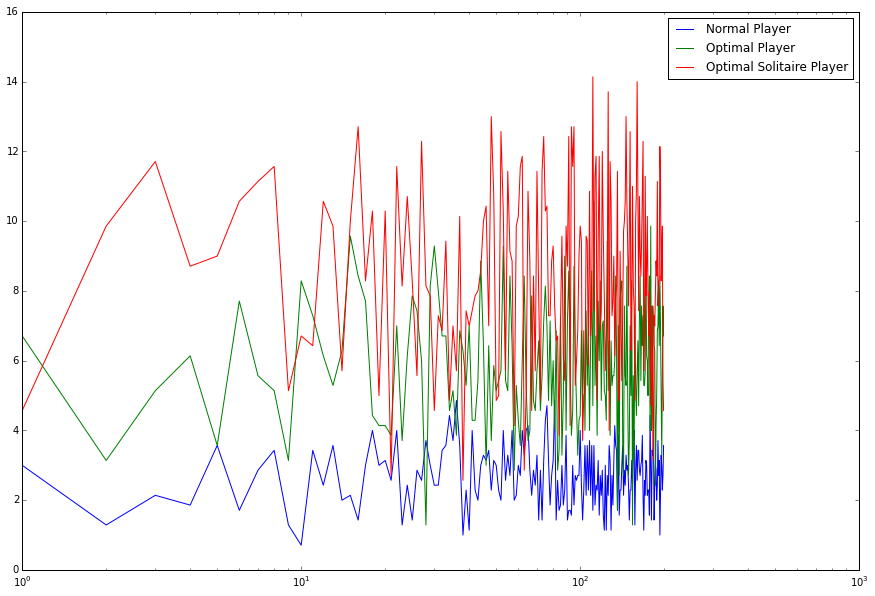

In [51]:
import matplotlib.pyplot as mplot
%matplotlib inline
mplot.figure(figsize=(15,10))
mplot.plot(simsplayer1, label="Normal Player")
mplot.plot(sims_optimal1, label="Optimal Player")
mplot.plot(sims_optimal_sol1, label="Optimal Solitaire Player")
mplot.xscale('log')
mplot.legend()
mplot.show()

In [52]:
simsplayer = []
sims_optimal = []
sims_optimal_sol= []
for _ in range(1000):
    player = Player()
    optimalplayer = OptimalPlayer()
    optimal_sol_player = OptimalSolitairePlayer()
    simsplayer.append(player.play(game.rounds))
    sims_optimal.append(optimalplayer.play(game.rounds))
    sims_optimal_sol.append(optimal_sol_player.play(game.rounds))

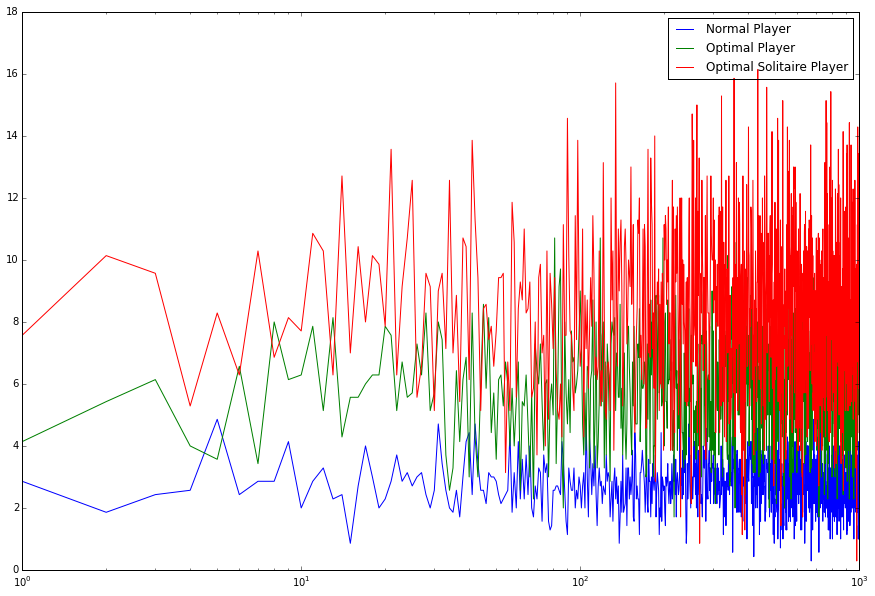

In [53]:
import matplotlib.pyplot as mplot
%matplotlib inline
mplot.figure(figsize=(15,10))
mplot.plot(simsplayer, label="Normal Player")
mplot.plot(sims_optimal, label="Optimal Player")
mplot.plot(sims_optimal_sol, label="Optimal Solitaire Player")
mplot.xscale('log')
mplot.legend()
mplot.show()

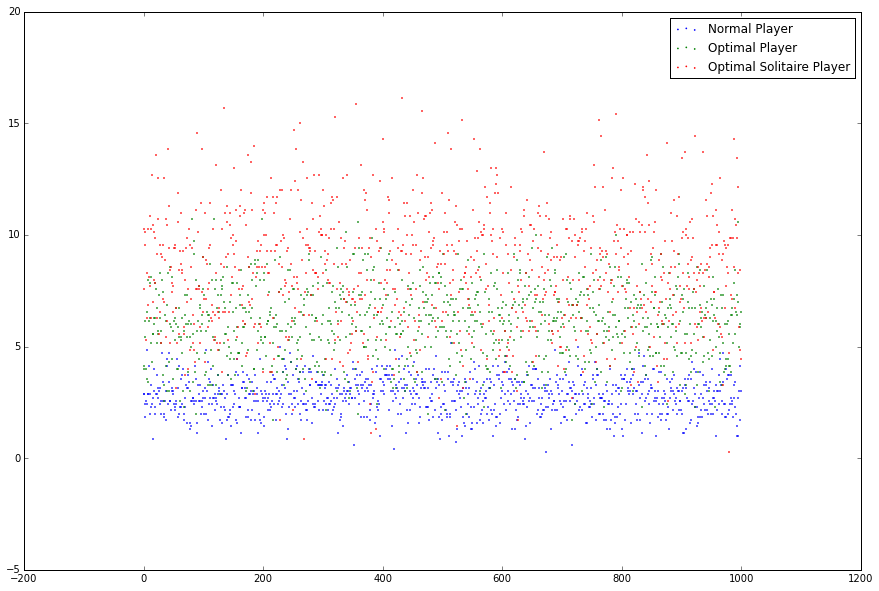

In [54]:
mplot.figure(figsize=(15,10))
mplot.scatter(range(len(simsplayer)), simsplayer, s= 0.5, color='blue', label="Normal Player")
mplot.scatter(range(len(sims_optimal)), sims_optimal, s= 0.5, color='green', label="Optimal Player")
mplot.scatter(range(len(sims_optimal_sol)), sims_optimal_sol, s= 0.5, color='red', label="Optimal Solitaire Player")
mplot.legend()
mplot.show()

###From the graphs, it shows that the Optimal Solitaire Player has higher chances of winning.
####This is deduced from the playing 7 rounds of the game for 200 and 1000 times